In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import time
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

import warnings
warnings.filterwarnings(action='ignore')

data_path = '/content/drive/MyDrive/data/'

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 20 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

In [ ]:
plt.rc('font', family='NanumBarunGothic')

In [ ]:
train_df = pd.read_csv(os.path.join(data_path, 'total_menu_final_category_property.csv')) # 전체 학습 데이터
all_df = pd.read_csv(os.path.join(data_path, 'total_menu_final_category_property.csv')) # 전체 데이터

In [ ]:
train_df.head()

,Unnamed: 0,Unnamed: 0.1,user_id,menu,menu_id,timestamp,category,property
0,0,0,0,함박스테이크,128,2,양식,고기류
1,1,1,0,컵라면&찐계란,512,3,한식,면류
2,2,2,0,시리얼과일샐러드,1200,5,한식,샐러드류
3,3,3,0,돼지고기장조림,866,8,한식,조림류
4,4,4,0,돈까스,695,9,일식,튀김류


# 유저 & 메뉴 확인

In [ ]:
# user sequence 길이
def get_show(title, val, col, x):
    plt.axvline(x = val, color=col)
    plt.text(val, x, f'{title}_{val}', color = col, fontsize=12)

sns.histplot(train_df["user_id"].value_counts())

mean_val = train_df["user_id"].value_counts().mean()
median_val = train_df["user_id"].value_counts().median()
min_val = train_df["user_id"].value_counts().min()
max_val = train_df["user_id"].value_counts().max()

get_show(title = 'mean', val = int(mean_val), col = 'r', x = 1400)
get_show(title = 'median', val = int(median_val), col = 'b', x = 3200)
get_show(title = 'min', val = int(min_val), col = 'g', x = 100)
get_show(title = 'max', val = int(max_val), col = 'purple', x = 3000)

plt.title('user sequence length')

In [ ]:
# User, Menu 갯수 확인
num_train_users = train_df['user_id'].nunique()
num_train_items = train_df['menu'].nunique()

print ("Number of train Menu:", len(train_df['menu']))
print ("Number of unique train Menu: ", num_train_items)
print ("Number of unique train users: ", num_train_users)
print("Data sparsity ratio: ", 1 - len(train_df) / (num_train_users * num_train_items))

Number of train Menu: 753
Number of unique train Menu:  209
Number of unique train users:  66
Data sparsity ratio:  0.9454110482818616


In [ ]:
# 중복되는 Menu 데이터 확인
train_df['menu'].value_counts()

돼지갈비찜     18
부대찌개      17
불고기       16
카레라이스     14
미니햄버거     12
          ..
참치주먹밥      1
유린기        1
차돌된장찌개     1
햄감자채볶음     1
캠핑구이세트     1
Name: menu, Length: 209, dtype: int64

In [ ]:
# 중복 메뉴 상위 15개
from collections import Counter
n = 15
c= Counter(train_df['menu'])
print(f"자주 나오는 메뉴 상위 {n}개 \n")
print("   메뉴    |   중복 횟수")
for x,y in c.most_common(n):
    print(x, "\t", y)

자주 나오는 메뉴 상위 15개 

   메뉴    |   중복 횟수
돼지갈비찜 	 18
부대찌개 	 17
불고기 	 16
카레라이스 	 14
미니햄버거 	 12
닭가슴살장조림 	 12
컵라면&찐계란 	 11
시리얼과일샐러드 	 11
김밥 	 11
감자탕 	 11
수제비 	 11
짬뽕 	 11
된장국 	 11
돈까스 	 10
알리오올리오파스타 	 10


In [ ]:
value = train_df['menu'].value_counts()
value = value.to_frame()

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 <a list of 15 Text major ticklabel objects>)

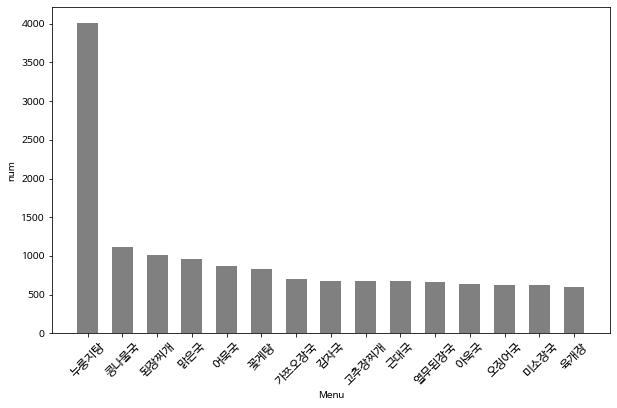

In [ ]:
xs=value.index.to_list()		
ys=value['menu'].to_list()			

plt.figure(figsize=(10, 6))			
plt.xlabel('Menu')			
plt.ylabel('num')				

plt.bar(xs[0:15], ys[0:15], width=0.6, color = 'gray')
plt.xticks(rotation=45, fontsize = 12)

- 전체 데이터 수는 134154개
- 전체 유저 수는 4518명
- 유저마다 session 길이 28~30
- 전체 메뉴 수는 2340개
- 메뉴마다 최소 9개에서 최대 4014번 중복

# category 및 property 확인

In [ ]:
num_train_ctg = train_df['category'].nunique()
num_train_pp = train_df['property'].nunique()

print ("Number of unique category: ", num_train_ctg)
print ("Number of unique property: ", num_train_pp)

Number of unique category:  4
Number of unique property:  20


In [ ]:
# 중복되는 category 데이터 확인
train_df['category'].value_counts()

한식    109788
양식     16776
중식      4614
일식      2976
Name: category, dtype: int64

In [ ]:
# 중복되는 property 데이터 확인
train_df['property'].value_counts()

국류        31038
볶음류       10680
고기류        9312
탕류         8982
샐러드류       8727
무침류        8577
튀김류        7725
빵류         7278
찌개류        7137
면류         6333
전류         6021
조림류        5817
구이류        5094
디저트류       4068
찜류         3582
패스트푸드류     3240
밥류          345
패스트부드류       81
회류           81
부침류          36
Name: property, dtype: int64

In [ ]:
109788/len(train_df)

0.8183729147099602

([0, 1, 2, 3], <a list of 4 Text major ticklabel objects>)

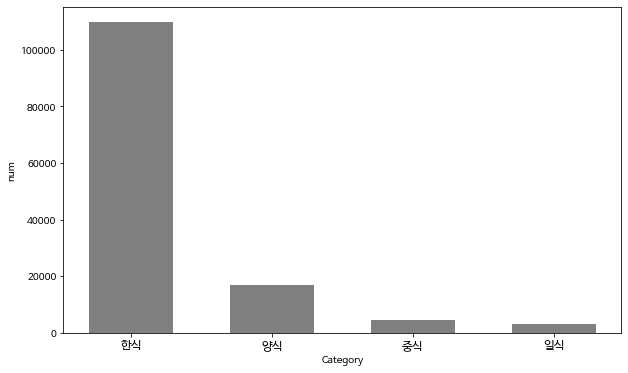

In [ ]:
# 카테고리 시각화
value = train_df['category'].value_counts()
value = value.to_frame()

xs=value.index.to_list()		
ys=value['category'].to_list()			

plt.figure(figsize=(10, 6))			
plt.xlabel('Category')			
plt.ylabel('num')				

plt.bar(xs[0:15], ys[0:15], width=0.6, color = 'gray')
plt.xticks(fontsize = 12)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 <a list of 15 Text major ticklabel objects>)

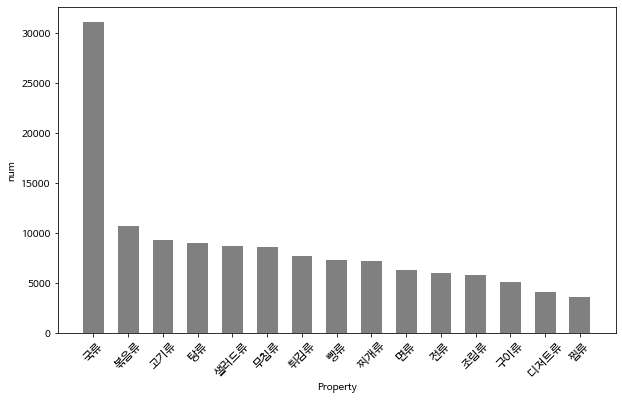

In [ ]:
# 속성 시각화
value = train_df['property'].value_counts()
value = value.to_frame()

xs=value.index.to_list()		
ys=value['property'].to_list()			

plt.figure(figsize=(10, 6))			
plt.xlabel('Property')			
plt.ylabel('num')				

plt.bar(xs[0:15], ys[0:15], width=0.6, color = 'gray')
plt.xticks(rotation = 45, fontsize = 12)